## Initializing the CUDA GPU

In [1]:
!nvidia-smi  # displaying information about available GPUs

Fri Nov 24 07:19:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 118.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found

In [3]:
import cudf

## Importing Libraries

In [4]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

from sklearn.model_selection import train_test_split
from keras.datasets import mnist

## Implementing the activation functions

In [5]:
# Implement the following activation functions (along with their gradient functions): sigmoid, tanh, ReLU, Leaky ReLU, linear, and softmax

# Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# Tanh Function
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


# ReLU Function
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


# Leaky ReLU Function
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, 0.01)


# Linear Function
def linear(x):
    return x

def linear_derivative(x):
    return 1


# Softmax Function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))

## Implementing the weight initialization functions

In [6]:
# Implement the following weight initialization functions: zero init, random init, and normal init (Normal(0, 1)). Choose appropriate scaling factors.

# Zero Initialization
def zero_init(shape):
    return np.zeros(shape)

# Random Initialization
def random_init(shape):
    return np.random.rand(shape[0], shape[1])

# Normal Initialization
def normal_init(shape):
    return np.random.normal(0, 1, (shape[0], shape[1]))

Implement a class named NeuralNetwork with the following parameters during initialization:
 • N: Number of layers in the network
• A list of size N specifying the number of neurons in each layer
• lr: Learning rate
• Activation function (same activation function is used in all layers of the network except the last layer)
• Weight initialization function
• Number of epochs

## Defining the Neural Network Class

In [7]:
class NeuralNetwork:
    def __init__(self, N, A, lr, activation, weight_init, epochs, batch_size):
        self.layers = N + 2
        self.lr = lr
        self.activation = activation
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = 1

        # Creating a list of neurons in each hidden layer
        self.neurons = A.copy()

        self.weights = []
        self.biases = []

        # Initializing the weights and biases
        for i in range(self.layers - 1):
            self.weights.append(self.initialize_weight((self.neurons[i + 1], self.neurons[i])))
            # self.biases.append(self.initialize_weight((self.neurons[i + 1], 1)))

        # Creating a dictionary for A and Z
        self.A = {}
        self.Z = {}

    def initialize_weight(self, shape):
        if self.weight_init == 'zero':
            return zero_init(shape)
        elif self.weight_init == 'random':
            return random_init(shape)
        elif self.weight_init == 'normal':
            return normal_init(shape)
        else:
            return np.random.randn(shape[1], shape[0]) * np.sqrt(1.0 / shape[1])


    def __activation_(self, x, derivative=False):
        if self.activation == 'sigmoid':
            if derivative:
                return sigmoid_derivative(x)
            else:
                return sigmoid(x)
        elif self.activation == 'tanh':
            if derivative:
                return tanh_derivative(x)
            else:
                return tanh(x)
        elif self.activation == 'relu':
            if derivative:
                return relu_derivative(x)
            else:
                return relu(x)
        elif self.activation == 'leaky_relu':
            if derivative:
                return leaky_relu_derivative(x)
            else:
                return leaky_relu(x)
        elif self.activation == 'linear':
            if derivative:
                return linear_derivative(x)
            else:
                return linear(x)
        elif self.activation == 'softmax':
            if derivative:
                return softmax_derivative(x)
            else:
                return softmax(x)

    def forward_prop(self, X_train):
        self.A[0] = X_train
        for i in range(self.layers - 2):
            self.Z[i + 1] = np.dot(self.weights[i], self.A[i])
            self.A[i + 1] = self.__activation_(self.Z[i + 1])

        # Z4 & A4 completed. Calculating Z5 & A5
        self.Z[self.layers-1] = np.dot(self.weights[self.layers - 2], self.A[self.layers - 2])
        self.A[self.layers-1] = softmax(self.Z[self.layers-1])

        return self.A[self.layers-1]

    def backward_prop(self, y_train, y_pred):
        # Calculating the gradients of the last layer
        # Calculating error
        dW = [0]*(self.layers - 1)
        dB = [0]*(self.layers - 1)
        error = y_pred - y_train

        de = 2 * error / y_pred.shape[0] * softmax_derivative(self.Z[self.layers-1])

        dW[self.layers - 2] = np.outer(de, self.A[self.layers - 2])

        # Calculating dW and dB for the rest of the layers
        for i in range(self.layers - 2, 0, -1):
            de = np.dot(self.weights[i].T, de) * self.__activation_(self.Z[i], derivative=True)
            dW[i - 1] = np.outer(de, self.A[i - 1])

        # Updating the weights and biases
        for i in range(self.layers - 1):
            self.weights[i] -= self.lr * dW[i]


    def __scale_data(self, X_train):
        # Scaling the data after each epoch for the MNIST dataset
        X_train = X_train / ((np.max(X_train) - np.min(X_train))*0.99) + 0.01
        return X_train


    def fit(self, X_train, y_train, X_val, y_val, early_stopping=False, tol=0.0001):
        # Training loss and validation loss
        train_loss = []
        val_loss = []

        # Scaling the data
        X_train = self.__scale_data(X_train)
        X_val = self.__scale_data(X_val)

        for i in range(self.epochs):
            for j in range(0, X_train.shape[0], self.batch_size):

                X_train_mini = X_train[j:j + self.batch_size].T
                y_train_mini = y_train[j:j + self.batch_size].T
                # Transforming the y_train_mini to a one-hot vector
                output_neuron_y = []
                for sample in y_train_mini:
                    temp = np.zeros(10) + 0.01
                    temp[sample] = 0.99
                    output_neuron_y.append(temp)
                output_neuron_y = np.array(output_neuron_y).T

                y_pred = self.forward_prop(X_train_mini)
                self.backward_prop(output_neuron_y, y_pred)

            # Print the accuracy after each epoch
            y_temp_pred = self.predict(X_train)
            y_temp_val_pred = self.predict(X_val)

            # Calculating the training loss
            train_loss.append(self.loss(y_train, y_temp_pred))

            # Calculating the validation loss
            val_loss.append(self.loss(y_val, y_temp_val_pred))

            print('Epoch', i, 'Validation Accuracy:', self.accuracy(y_val, y_temp_val_pred), 'Training Accuracy:', self.accuracy(y_train, y_temp_pred))
            print('Epoch', i, 'Validation Loss:', val_loss[i], 'Training Loss:', train_loss[i])
            print('--------------------------------------------------')

            # Early stopping
            if early_stopping:
                if i > 0:
                    if abs(val_loss[i] - val_loss[i - 1]) < tol:
                        print('Early Stopping')
                        break

        return train_loss, val_loss

    def predict(self, X_test):
        y_pred = []
        for sample in X_test:
            y_pred.append(np.argmax(self.forward_prop(sample)))
        return y_pred

    def predict_proba(self, X_test):
        y_pred = self.forward_prop(X_test)
        return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

    def loss(self, y_train, y_pred):
        loss = np.sum(-y_train * np.log(y_pred))
        return loss

    def accuracy(self, y_test, y_pred):
        p = []
        for i in range(len(y_pred)):
            out_test = np.zeros(10) + 0.01
            out_test[y_test[i]] = 0.99
            p.append(y_pred[i] == np.argmax(out_test))

        return np.mean(p)

### Loading the dataset

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

11490434/11490434 [==============================] - 0s 0us/step


### Testing the model

In [8]:
NN = NeuralNetwork(N=2, A=[784, 256, 32, 10], lr=0.001, activation='sigmoid', weight_init='normal', epochs=100, batch_size=128)

In [10]:
train_loss, val_loss = NN.fit(X_train, y_train, X_test, y_test)

<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y_train * np.log(y_pred))
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y_train * np.log(y_pred))


Epoch 0 Validation Accuracy: 0.1229 Training Accuracy: 0.12261666666666667
Epoch 0 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 1 Validation Accuracy: 0.1534 Training Accuracy: 0.15058333333333335
Epoch 1 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 2 Validation Accuracy: 0.1767 Training Accuracy: 0.16893333333333332
Epoch 2 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 3 Validation Accuracy: 0.1886 Training Accuracy: 0.18261666666666668
Epoch 3 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 4 Validation Accuracy: 0.2043 Training Accuracy: 0.1968
Epoch 4 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 5 Validation Accuracy: 0.2202 Training Accuracy: 0.20891666666666667
Epoch 5 Validation Loss: nan Training Loss: nan
--------------------

KeyboardInterrupt: ignored

### Plot Functions

In [11]:
def plot_loss(train_loss, val_loss):
    plt.figure(figsize=(10, 10))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.show()

### SigMoid

In [12]:
NN = NeuralNetwork(N=4, A=[784, 256,128,64,32, 10], lr=0.001, activation='sigmoid', weight_init='normal', epochs=100, batch_size=128)

In [13]:
train_loss, val_loss = NN.fit(X_train, y_train, X_test, y_test, early_stopping=True)

<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y_train * np.log(y_pred))
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y_train * np.log(y_pred))


Epoch 0 Validation Accuracy: 0.0958 Training Accuracy: 0.10073333333333333
Epoch 0 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 1 Validation Accuracy: 0.1084 Training Accuracy: 0.11296666666666667
Epoch 1 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 2 Validation Accuracy: 0.1296 Training Accuracy: 0.1315
Epoch 2 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 3 Validation Accuracy: 0.1555 Training Accuracy: 0.15928333333333333
Epoch 3 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 4 Validation Accuracy: 0.182 Training Accuracy: 0.1863
Epoch 4 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 5 Validation Accuracy: 0.2026 Training Accuracy: 0.20351666666666668
Epoch 5 Validation Loss: nan Training Loss: nan
----------------------------------

KeyboardInterrupt: ignored

In [14]:
plot_loss(train_loss, val_loss)

NameError: ignored

### TanH

In [15]:
NN = NeuralNetwork(N=4, A=[784, 256,128,64,32, 10], lr=0.001, activation='tanh', weight_init='normal', epochs=100, batch_size=128)

In [16]:
train_loss, val_loss = NN.fit(X_train, y_train, X_test, y_test, early_stopping=True)

<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y_train * np.log(y_pred))
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y_train * np.log(y_pred))


Epoch 0 Validation Accuracy: 0.1262 Training Accuracy: 0.13385
Epoch 0 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 1 Validation Accuracy: 0.1446 Training Accuracy: 0.14825
Epoch 1 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 2 Validation Accuracy: 0.1485 Training Accuracy: 0.15453333333333333
Epoch 2 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 3 Validation Accuracy: 0.1471 Training Accuracy: 0.15221666666666667
Epoch 3 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 4 Validation Accuracy: 0.1426 Training Accuracy: 0.14991666666666667
Epoch 4 Validation Loss: nan Training Loss: nan
--------------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
plot_loss(train_loss, val_loss)

### Leaky Relu

In [17]:
NN = NeuralNetwork(N=4, A=[784, 256,128,64,32, 10], lr=0.001, activation='leaky_relu', weight_init='normal', epochs=100, batch_size=128)

In [18]:
train_loss, val_loss = NN.fit(X_train, y_train, X_test, y_test, early_stopping=True)

<ipython-input-5-57d3f8a8ec65>:45: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
<ipython-input-5-57d3f8a8ec65>:45: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y_train * np.log(y_pred))
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y_train * np.log(y_pred))


Epoch 0 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 0 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 1 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 1 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 2 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 2 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 3 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 3 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 4 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 4 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 5 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 5 Validation Loss: nan Training Loss: nan
-------------

KeyboardInterrupt: ignored

In [ ]:
plot_loss(train_loss, val_loss)

### Linear

In [20]:
NN = NeuralNetwork(N=4, A=[784, 256,128,64,32, 10], lr=0.001, activation='linear', weight_init='normal', epochs=100, batch_size=128)

In [21]:
train_loss, val_loss = NN.fit(X_train, y_train, X_test, y_test, early_stopping=True)

<ipython-input-5-57d3f8a8ec65>:45: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
<ipython-input-5-57d3f8a8ec65>:45: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y_train * np.log(y_pred))
<ipython-input-7-2af6ec768c0e>:213: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y_train * np.log(y_pred))


Epoch 0 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 0 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 1 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 1 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 2 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 2 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 3 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 3 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 4 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 4 Validation Loss: nan Training Loss: nan
--------------------------------------------------
Epoch 5 Validation Accuracy: 0.098 Training Accuracy: 0.09871666666666666
Epoch 5 Validation Loss: nan Training Loss: nan
-------------

KeyboardInterrupt: ignored

In [ ]:
plot_loss(train_loss, val_loss)

### Plotting first 10 images

In [22]:
def plot_first_10_images(X_train, y_train):
    plt.figure(figsize=(20, 20))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(y_train[i])
        plt.axis('off')
    plt.show()

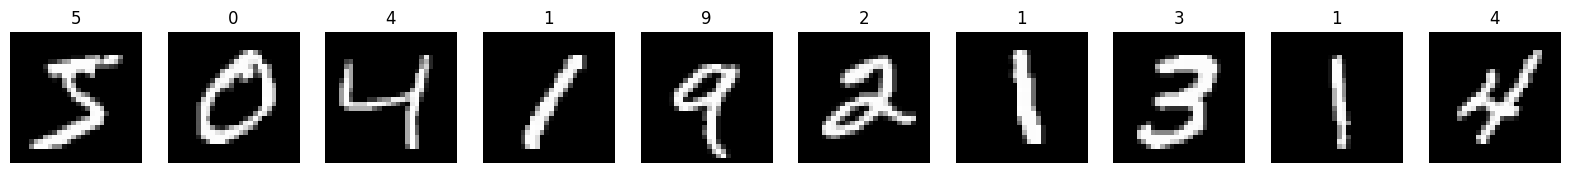

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plot_first_10_images(X_train, y_train)